# Case Study: Classification with k-Nearest Neighbors and the Digits Dataset
* To process mail efficiently and route each letter to the correct destination, postal service computers must be able to **scan handwritten names, addresses and zip codes** and **recognize the letters and digits**
* **Scikit-learn** enables even novice programmers to make such machine-learning problems manageable

<hr style="height:2px; border:none; color:black; background-color:black;">

### Supervised Machine Learning: Classification 
* Attempt to **predict the distinct class** (category) to which a **sample** belongs
    * **Binary classification**&mdash;**two** classes (e.g., “dog” or “cat”)
* [**Digits dataset**](http://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset) bundled with scikit-learn
    * 8-by-8 pixel images representing 1797 hand-written digits (0 through 9) 
* Goal: **Predict** which digit an image represents
    * **Multi-classification**&mdash;**10 possible digits** (the classes)
* Train a classification model using **labeled data**—know in advance each digit’s class
* We’ll use one of the simplest machine-learning classification algorithms, **k-nearest neighbors (k-NN)**, to **recognize handwritten digits** 

<hr style="height:2px; border:none; color:black; background-color:black;">

## k-Nearest Neighbors Algorithm (k-NN) 
* Predict a sample’s class by looking at the **_k_ training samples** **nearest in "distance"** to the **sample** 
* Filled dots represent four distinct classes—A (blue), B (green), C (red) and D (purple) 
* **Class with the most “votes” wins**
    * **Odd _k_ value** **avoids ties** &mdash; there’s never an equal number of votes
    
<img src="./images/nearest.png" alt="Diagram for the discussion of the k-nearest neighbors algorithm" width=300/>

<hr style="height:2px; border:none; color:black; background-color:black;">

## 15.2.2 Loading the Dataset with the **`load_digits` Function** 
* Returns a **`Bunch`** object containing **digit samples** and **metadata**
* A **`Bunch`** is a dictionary with additional **dataset-specific attributes**

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()  

<hr style="height:2px; border:none; color:black; background-color:black;">

### Displaying Digits Dataset's Description
* **Digits dataset** is a subset of the [**UCI (University of California Irvine) ML hand-written digits dataset**](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)
    * Original dataset: **5620 samples**—3823 for **training** and 1797 for **testing** 
    * **Digits dataset**: Only the **1797 testing samples**
* A Bunch’s **`DESCR` attribute** contains dataset's description 
    * Each sample has **`64` features** (**`Number of Attributes`**) that represent an **8-by-8 image** with **pixel values `0`–`16`** (**`Attribute Information`**)
    * **No missing values** (**`Missing Attribute Values`**) 
* **64 features** may seem like a lot
    * Datasets can have **hundreds**, **thousands** or even **millions of features**
    * Processing datasets like these can require enormous computing capabilities

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<hr style="height:2px; border:none; color:black; background-color:black;">

### Checking the Sample and Target Sizes
* `Bunch` object’s **`data`** and **`target`** attributes are **NumPy arrays**:
    * **`data` array**: The **1797 samples** (digit images), each with **64 features** with values**&nbsp;0** (white) to **16** (black), representing **pixel intensities**
    ![Pixel intensities in grayscale shades from white (0) to black (16)](./images/grays.png "Pixel intensities in grayscale shades from white (0) to black (16)")

    * **`target` array**: The **images’ labels**, (classes) indicating **which digit** each image represents

In [4]:
digits.target[::100]  # target values of every 100th sample

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])


* Confirm number of **samples** and **features** (per sample) via `data` array’s **`shape`**

In [5]:
digits.data.shape

(1797, 64)

* Confirm that **number of target values matches number of samples** via `target` array’s `shape`

In [6]:
digits.target.shape

(1797,)

<hr style="height:2px; border:none; color:black; background-color:black;">

### A Sample Digit Image 
* Images are **two-dimensional**—width and a height in pixels 
* Digits dataset's `Bunch` object has an **`images` attribute**
    * Each element is an **8-by-8 array** representing a **digit image’s pixel intensities**
* Scikit-learn stores the intensity values as **NumPy type `float64`**

In [11]:
digits.images[13]  # show array for sample image at index 13

array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

* Visualization of `digits.images[13]`

    <img src="./images/sampledigit3.png" alt="Image of a handwritten digit 3" width="200px"/>

<hr style="height:2px; border:none; color:black; background-color:black;">

### Preparing the Data for Use with Scikit-Learn
* Scikit-learn estimators require samples to be stored in a **two-dimensional array of floating-point values** (or **list of lists** or **pandas `DataFrame`**): 
	* Each **row** represents one **sample** 
	* Each **column** in a given row represents one **feature** for that sample
* Multi-dimensional data samples must be **flattened** into a **one-dimensional array** 
* For **categorical features** (e.g., **strings** like `'spam'` or `'not-spam'`), you’d have to **preprocess** those features into **numerical values**—known as **one-hot encoding** (discussed later in deep learning)


* **`load_digits`** returns the **preprocessed data** ready for machine learning 
* **8-by-8 array `digits.images[13]`** corresponds to **1-by-64 array `digits.data[13]`**:

In [12]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

## Visualizing the Data
* Always familiarize yourself with your data&mdash;called **data exploration** 
* Let's **visualize** the dataset’s first 24 images with **Matplotlib**
* To see **how difficult a problem handwritten digit recognition is**, consider the **variations** among the images of the 3s in the first, third and fourth rows, and look at the images of the 2s in the first, third and fourth rows. 


<img src="./images/24digits.png" alt="First 24 digit images in the digits dataset" width=400/>

### Creating the Diagram
* **Color map `plt.cm.gray_r`** is for **grayscale** with **0 for white**
* [**Matplotlib’s color map names**](https://matplotlib.org/examples/color/colormaps_reference.html)&mdash;accessible via **`plt.cm` object** or a **string, like `'gray_r'`**

In [13]:
import matplotlib.pyplot as plt

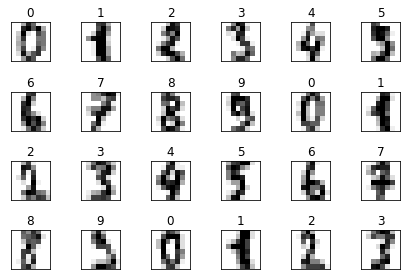

In [14]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item 
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

<hr style="height:2px; border:none; color:black; background-color:black;">

## Splitting the Data for Training and Testing
* Typically **train** a model with a **subset of a dataset**
* **Save a portion for testing**, so you can evaluate a model’s performance using **unseen data**
* Function **`train_test_split`** **shuffles** the data to **randomize** it, then **splits** the **samples** in the `data` array and the **target values** in the `target` array into **training** and **testing sets**
    * Shuffling helps ensure that the **training and testing sets** have **similar characteristics**
    * Returns a **tuple of four elements** in which the **first two** are the **samples** split into **training** and **testing sets**, and the **last two** are the **corresponding target values** split into **training** and **testing sets**


* Convention: 
    * **Uppercase `X`** represents **samples**
    * **Lowercase `y`** represents **target values**

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=11)  # random_state for reproducibility

* Scikit-learn bundled classification datasets have **balanced classes**
    * Samples are **divided evenly** among the classes
    * **Unbalanced classes** could lead to incorrect results

<hr style="height:2px; border:none; color:black; background-color:black;">

### Training and Testing Set Sizes 
* **By default**, `train_test_split` reserves **75%** of the data for **training** and **25%** for **testing**
    * See how to customize this in my [**Python Fundamentals LiveLessons** videos](https://learning.oreilly.com/videos/python-fundamentals/9780135917411/9780135917411-PFLL_Lesson14_11) or in [**Python for Programmers**, Section 14.2.4](https://learning.oreilly.com/library/view/python-for-programmers/9780135231364/ch14.xhtml#ch14lev2sec8)

In [18]:
X_train.shape

(1347, 64)

In [19]:
X_test.shape

(450, 64)

<hr style="height:2px; border:none; color:black; background-color:black;">

## Creating the Model 
* In **scikit-learn**, **models** are called **estimators** 
* **`KNeighborsClassifier`** estimator implements the **k-nearest neighbors algorithm**

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier()

<hr style="height:2px; border:none; color:black; background-color:black;">

## Training the Model with the `KNeighborsClassifier` Object’s **`fit` method**
* Load **sample training set (`X_train`)** and **target training set (`y_train`)** into the estimator

In [22]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier()

* **`n_neighbors`** corresponds to **_k_ in the k-nearest neighbors algorithm** 
* [`KNeighborsClassifier` default settings](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


* **`fit` normally loads data** into an **estimator** then performs complex calculations **behind the scenes** that **learn** from the data to train a model
* **`KNeighborsClassifier`’s `fit` method** **just loads the data** 
    * **No initial learning process** 
    * The **estimator** is **lazy** &mdash; work is performed only when you use it to make predictions
* **Lots of models** have **significant training phases** that can take minutes, hours, days or more 
    * High-performance **GPUs** and **TPUs** can significantly **reduce model training time**

<hr style="height:2px; border:none; color:black; background-color:black;">

## Predicting Digit Classes with the `KNeighborsClassifier`’s  **`predict` method**
* Returns an array containing the **predicted class of each test image**: 

In [23]:
predicted = knn.predict(X=X_test)

In [24]:
expected = y_test

* **`predicted` digits** vs. **`expected` digits** for the first 20 test samples&mdash;see **index 18**

In [25]:
predicted[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [26]:
expected[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])


* Locate **all incorrect predictions** for the **entire test set**: 

In [27]:
wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

In [28]:
wrong

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

* **Incorrectly predicted only 10 of the 450 test samples**

<hr style="height:2px; border:none; color:black; background-color:black;">

# Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2
## Metrics for Measuring Model Accuracy 

### Estimator Method `score`
* Returns an **indication of how well the estimator performs** on **test data** 
* For **classification estimators**, returns the **prediction accuracy** for the test data:

In [ ]:
# Definition of accuracy
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')


# Can be computed directly
print(f'{knn.score(X_test, y_test):.2%}')

* `kNeighborsClassifier` with default **_k_** of 5 achieved **97.78% prediction accuracy** using only the estimator’s **default parameters**
* Can use **hyperparameter tuning** to try to determine the **optimal value for _k_**

### Confusion Matrix
* Shows correct and incorrect predicted values (the **hits** and **misses**) for a given class 

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion = confusion_matrix(y_true=expected, y_pred=predicted)

In [ ]:
confusion


* **Correct predictions** shown on **principal diagonal** from top-left to bottom-right
* **Nonzero values** not on **principal diagonal** indicate **incorrect predictions** 
* Each **row** represents **one distinct class** (0–9) 
* **Columns** specify how many **test samples** were classified into classes 0–9 
* **Row 0** shows digit class **`0`**&mdash;**all 0s were predicted correctly**
>`[45,  0,  0,  0,  0,  0,  0,  0,  0,  0]`
* **Row 8** shows digit class **`8`**&mdash;**five 8s were predicted incorrectly**
>`[ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1]`

    * **Correctly predicted 88.63%** (39 of 44) of `8`s
    * 8s harder to recognize

### Visualizing the Confusion Matrix 
* A **heat map** displays **values** as **colors**
* Convert the **confusion matrix** into a **`DataFrame`**, then graph it
* **Principal diagonal** and **incorrect predictions** stand out nicely in **heat map**

In [ ]:
import pandas as pd

In [ ]:
confusion_df = pd.DataFrame(confusion, index=range(10), columns=range(10))

In [ ]:
import seaborn as sns

In [ ]:
figure = plt.figure(figsize=(7, 6))
axes = sns.heatmap(confusion_df, annot=True, 
                   cmap=plt.cm.nipy_spectral_r) 

<!-- ### Visualizing the Confusion Matrix (3 of 4)
![Confusion matrix displayed as a heat map](./ch14images/confusion_nipy_spectral_r.png "Confusion matrix displayed as a heat map") -->

<hr style="height:2px; border:none; color:black; background-color:black;">

## K-Fold Cross-Validation
* Uses **all of your data** for **training and testing**
* Gives a better sense of how well your model will make predictions
* **Splits the dataset** into **_k_ equal-size folds** (unrelated to**&nbsp;k** in the k-nearest neighbors algorithm)
* **Repeatedly trains** your model with **_k_ – 1 folds** and **test the model** with the **remaining fold**
* Consider using **_k_ = 10** with **folds numbered 1 through 10**
	* **train** with **folds 1–9**, then **test** with **fold 10**
	* **train** with **folds 1–8 and 10**, then **test** with **fold 9**
	* **train** with **folds 1–7** and **9–10**, then **test** with **fold 8**
    * ...

### `KFold` Class
* **`KFold`** class and function **`cross_val_score`** perform **k-fold cross validation** 
* **`n_splits=10`** specifies the **number of folds**
* **`shuffle=True`** **randomizes** the data before **splitting it into folds** 
	* Particularly **important** if the **samples** might be **ordered** or **grouped** (as in **Iris dataset** we'll see later)

In [29]:
from sklearn.model_selection import KFold

In [30]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

### Calling Function `cross_val_score` to Train and Test Your Model
* **`estimator=knn`** &mdash; **estimator** to validate
* **`X=digits.data`** &mdash; **samples** to use for training and testing
* **`y=digits.target`** &mdash; **target predictions** for the samples
* **`cv=kfold`** &mdash; **cross-validation generator** that defines how to **split** the **samples** and **targets** for training and testing

In [31]:
from sklearn.model_selection import cross_val_score

In [32]:
scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)


* Lowest accuracy was **97.78%** &mdash; one was **100%**

In [33]:
scores  # array of accuracy scores for each fold

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [ ]:
print(f'Mean accuracy: {scores.mean():.2%}')

* Mean accuracy even better than the **97.78% we achieved** when we **trained** the model with **75%** of the data and **tested** the model with **25%** earlier

<hr style="height:2px; border:none; color:black; background-color:black;">

## Running Multiple Models to Find the Best One
* **Difficult to know in advance** which machine learning model(s) will **perform best for a given dataset**
    * Especially when they hide the details of how they operate
* Even though the **`KNeighborsClassifier`** predicts digit images with a high degree of accuracy, it’s **possible** that other estimators are **even more accurate**
* Let’s **compare** **`KNeighborsClassifier`**, **`SVC`** and **`GaussianNB`**

In [34]:
from sklearn.svm import SVC

In [35]:
from sklearn.naive_bayes import GaussianNB

* **Create the estimators** 
* To avoid a scikit-learn warning, we supplied a keyword argument when creating the **`SVC`** estimator
    * This argument’s value will become the default in scikit-learn version 0.22

In [36]:
estimators = {
    'KNeighborsClassifier': knn, 
    'SVC': SVC(gamma='scale'),
    'GaussianNB': GaussianNB()}

* **Execute the models**: 

In [37]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=digits.data, y=digits.target, cv=kfold)
    print(f'{estimator_name:>20}: ' + 
          f'mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

KNeighborsClassifier: mean accuracy=98.72%; standard deviation=0.75%
                 SVC: mean accuracy=98.72%; standard deviation=0.79%
          GaussianNB: mean accuracy=84.48%; standard deviation=3.47%


* **`KNeighborsClassifier`** and **`SVC`** estimators’ accuracies are identical so we might want to **perform hyperparameter tuning** on each to determine the best

<hr style="height:2px; border:none; color:black; background-color:black;">

## Hyperparameter Tuning
* In real-world machine learning studies, you’ll want to **tune hyperparameters** to choose values that produce the **best possible predictions**
* To **determine** the **best value** for **_k_** in the **kNN algorithm**, **try different values** and **compare performance**  
* Scikit-learn also has **automated hyperparameter tuning** capabilities

* Create `KNeighborsClassifiers` with odd **k** values from 1 through 19
* Perform **k-fold cross-validation** on each

In [ ]:
for k in range(1, 20, 2):  # k is an odd value 1-19; odds prevent ties
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, 
        X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
          f'standard deviation={scores.std():.2%}')

* **Machine learning** is not without its **costs**, especially in **big data** and **deep learning**
* **Compute time grows rapidly with _k_**, because **k-NN** needs to perform **more calculations** to find the **nearest neighbors**
* Can use function **`cross_validate`** to perform cross-validation **and** time the results

Material (modified) from Chapter 15 of the book 'Intro to Python for Computer Science and Data Science: Learning to Program with AI, Big Data and the Cloud' Pearson